In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [2]:
import warnings
warnings.filterwarnings('ignore')

In [3]:
df = pd.read_csv('spam_ham_dataset.csv')
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,Subject: enron methanol ; meter # : 988291\r\n...,0
1,2349,ham,"Subject: hpl nom for january 9 , 2001\r\n( see...",0
2,3624,ham,"Subject: neon retreat\r\nho ho ho , we ' re ar...",0
3,4685,spam,"Subject: photoshop , windows , office . cheap ...",1
4,2030,ham,Subject: re : indian springs\r\nthis deal is t...,0


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5171 entries, 0 to 5170
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   Unnamed: 0  5171 non-null   int64 
 1   label       5171 non-null   object
 2   text        5171 non-null   object
 3   label_num   5171 non-null   int64 
dtypes: int64(2), object(2)
memory usage: 161.7+ KB


In [5]:
df.text = df.text.apply(lambda x: x.replace('\r\n', ' '))

In [6]:
df.text = df.text.apply(lambda x: x[9:])

In [7]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,enron methanol ; meter # : 988291 this is a fo...,0
1,2349,ham,"hpl nom for january 9 , 2001 ( see attached fi...",0
2,3624,ham,"neon retreat ho ho ho , we ' re around to that...",0
3,4685,spam,"photoshop , windows , office . cheap . main tr...",1
4,2030,ham,re : indian springs this deal is to book the t...,0


In [8]:
df.text.str.startswith('re : ').sum(), df.text.str.startswith('fw : ').sum()

(781, 161)

In [9]:
df[df.text.str.startswith('re : ')].head()

,Unnamed: 0,label,text,label_num
4,2030,ham,re : indian springs this deal is to book the t...,0
16,2643,ham,re : first delivery - wheeler operating vance ...,0
23,2221,ham,re : tenaska iv 10 / 00 we have received all o...,0
25,1811,ham,"re : enron / hpl actuals for october 11 , 2000...",0
29,441,ham,re : valero gas marketing ; meter # : 8018 / s...,0


In [10]:
df[df.text.str.startswith('re : ')].index

Int64Index([   4,   16,   23,   25,   29,   33,   44,   45,   54,   56,
            ...
            5108, 5109, 5110, 5130, 5138, 5139, 5140, 5145, 5154, 5163],
           dtype='int64', length=781)

In [11]:
def startRemove(word):
    l = len(word)
    if df.text.str.startswith(word).sum() > 0:
        df.iloc[df[df.text.str.startswith(word)].index, 2] = df.iloc[df[df.text.str.startswith(word)].index, 2].apply(lambda x: x[l:])

In [12]:
startRemove('re : ')

In [13]:
df.head()

,Unnamed: 0,label,text,label_num
0,605,ham,enron methanol ; meter # : 988291 this is a fo...,0
1,2349,ham,"hpl nom for january 9 , 2001 ( see attached fi...",0
2,3624,ham,"neon retreat ho ho ho , we ' re around to that...",0
3,4685,spam,"photoshop , windows , office . cheap . main tr...",1
4,2030,ham,indian springs this deal is to book the teco p...,0


In [14]:
df[df.text.str.startswith('re : ')].head()

,Unnamed: 0,label,text,label_num
1057,3830,spam,re : re : your document please read the attach...,1


In [15]:
df.iloc[1057, 2] = df.iloc[1057, 2][10:] # or startRemove('re : ')

In [16]:
df[df.text.str.startswith('re : ')]

,Unnamed: 0,label,text,label_num


In [17]:
startRemove('fw : ')

In [18]:
df[df.text.str.startswith('fw : ')].head()

,Unnamed: 0,label,text,label_num
49,577,ham,fw : gap gift certificates - - - - - original ...,0
140,3148,ham,fw : equistar 1373 for march daren - i won ' t...,0
424,3134,ham,fw : march 2001 invoice daren - dow hydrocarbo...,0
1442,3155,ham,"fw : march 2001 invoice thanks mary ! daren , ...",0
1480,2143,ham,fw : fw : dance off to select the next preside...,0


In [19]:
startRemove('fw : ')

In [20]:
startRemove('fw : ')

In [21]:
df[df.text.str.startswith('fw : ')].head()

,Unnamed: 0,label,text,label_num


In [22]:
df.text.str.startswith('fwd : ').sum(), df.text.str.startswith('cfp : ').sum()

(23, 1)

In [23]:
startRemove('fwd : ')
startRemove('cfp : ')

In [24]:
df.text.str.startswith('fwd : ').sum(), df.text.str.startswith('fw : ').sum(), df.text.str.startswith('clf : ').sum(), df.text.str.startswith('re : ').sum()

(0, 1, 0, 1)

In [25]:
startRemove('fw : ')
startRemove('re : ')
df.text.str.startswith('fwd : ').sum(), df.text.str.startswith('fw : ').sum(), df.text.str.startswith('clf : ').sum(), df.text.str.startswith('re : ').sum()

(1, 0, 0, 0)

In [26]:
startRemove('fwd : ')
df.text.str.startswith('fwd : ').sum(), df.text.str.startswith('fw : ').sum(), df.text.str.startswith('re : ').sum()

(0, 0, 0)

In [27]:
df.sample(15)

,Unnamed: 0,label,text,label_num
4509,548,ham,updates for april here is the updated version,0
2072,4673,spam,secrets of the rich and powerful revealed ! di...,1
2101,3592,ham,lobo payout because the payback was done for o...,0
4338,3531,ham,"logistics powerpoint presentation hi all , thi...",0
4467,4386,spam,nasty slut getting fucked hard you have the ad...,1
4651,1053,ham,sap - timekeeping you should have received you...,0
3277,3922,spam,"paramagnet isaac , ( 75 % off for all new soft...",1
2690,38,ham,misc . questions hhere are some questions for ...,0
3157,3978,spam,"tape drives ( internal charset = us - ascii "" ...",1
1170,2602,ham,"eastrans nomination effective march 1 , 2001 e...",0


In [28]:
startRemove('( no subject ) ')
startRemove('cc : ')
startRemove('[ fwd: ] ')

In [29]:
df.drop(['Unnamed: 0', 'label'], axis=1, inplace=True)
df.sample(5)

,text,label_num
3593,new enrononline functionality several changes ...,0
2386,over $ 50 - - you made it happen ! on wall str...,0
3642,"revision # 1 - enron actuals for may 11 , 2000...",0
1032,"hi paliourg , like to watch real people gettin...",1
1708,noms / actual flow for 03 / 09 thru 3 / 11 / 0...,0


In [30]:
df.rename(columns={'label_num': 'target'}, inplace=True)
df.sample(3)

,text,target
3146,"enron / hpl actuals for sept . 14 , 2000 teco ...",0
4620,"rolex , cartier , piaget replicas - expensive ...",1
349,organizational announcement please note the fo...,0


In [31]:
df.isnull().sum()

text      0
target    0
dtype: int64

In [32]:
df.duplicated().sum()

270

In [33]:
df[df.duplicated()].sample(5)

,text,target
4071,cornhusker thanks for the information below . ...,0
5058,desk to desk ticket between nng and pgev and o...,0
5007,heads - up - tenaska iv partner ltd . - septem...,0
3209,"hpl nom for march 15 , 2001 ( see attached fil...",0
4324,meter 1558 daren - meter 1558 has no nom for m...,0


In [34]:
df.drop_duplicates(keep='first', inplace=True)
df.duplicated().sum()

0

In [35]:
df.shape

(4901, 2)

## EDA

<AxesSubplot:xlabel='target', ylabel='count'>

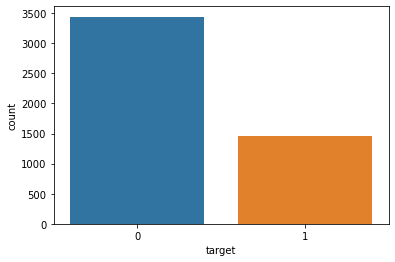

In [36]:
sns.countplot(df.target)

In [37]:
df.target.value_counts()

0    3441
1    1460
Name: target, dtype: int64

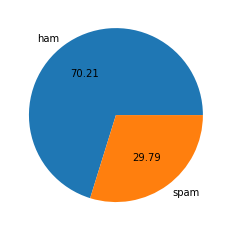

In [38]:
plt.pie(df.target.value_counts(), labels=['ham', 'spam'], autopct="%0.2f");

In [39]:
import nltk

In [40]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\Yogesh
[nltk_data]     Jadhav\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [41]:
df['count_chars'] = df.text.apply(len)
df.sample(5)

,text,target,count_chars
1518,"failed deals hi daren , as per our phone conve...",0,273
40,"vlc , 0 dln for sale , no prior pres . crip . ...",1,416
4521,"dermatology , neurology , pathology , the new ...",1,1556
2551,"vicodin for sale , no prior prescription neede...",1,671
1707,"jenkins gilbert , online doctorxx ! up to 70 %...",1,211


In [42]:
df['count_words'] = df.text.apply(lambda x: len(nltk.word_tokenize(x)))
df.sample(5)

,text,target,count_chars,count_words
2900,fyi - - - kinder morgan stg fyi - - kinder mor...,0,137,31
5133,"revised nomination - cody energy daren , i rec...",0,245,54
5161,penny stocks are about timing nomad internatio...,1,4081,764
4396,feedback monitor error - meter 984132 - 1 / 99...,0,1235,318
2847,save a bundle on meds ! font color = whiteisaa...,1,2289,486


In [43]:
df['count_sent'] = df.text.apply(lambda x: len(nltk.sent_tokenize(x)))
df.sample(5)

,text,target,count_chars,count_words,count_sent
2906,sexually - explicit : meet the wildest babes s...,1,680,123,14
1411,acrobat pro 7 . 0 $ 69 . 95 xp pro opt - in em...,1,2930,554,26
4913,tdk cd labeling kit @ $ 12 . 00 cd labeling ki...,1,2306,479,42
404,viagra soft tabs viagra soft tabs is the # 1 m...,1,586,121,7
5128,hplc / tglo deals darren : i have a request fr...,0,602,141,9


In [44]:
df.count_chars.max(), df.count_chars.min()

(31846, 1)

In [45]:
df.count_words.max(), df.count_words.min()

(8859, 0)

In [46]:
df.count_sent.max(), df.count_sent.min()

(1204, 0)

In [47]:
df[df.count_sent == 1204]

,text,target,count_chars,count_words,count_sent
949,""" red , white and blue out "" - - - - - origina...",0,31846,8859,1204


In [48]:
df[df.count_chars == 1]

,text,target,count_chars,count_words,count_sent
154,,1,1,0,0


In [49]:
(df.count_words == 0).sum(), (df.count_sent == 0).sum()

(1, 1)

In [50]:
df.describe()

,target,count_chars,count_words,count_sent
count,4901.000000,4901.000000,4901.000000,4901.000000
mean,0.297898,1047.502959,232.623138,13.391961
std,0.457381,1535.264946,343.056204,27.111395
min,0.000000,1.000000,0.000000,0.000000
25%,0.000000,240.000000,52.000000,4.000000
50%,0.000000,537.000000,123.000000,7.000000
75%,1.000000,1240.000000,287.000000,15.000000
max,1.000000,31846.000000,8859.000000,1204.000000


In [51]:
df[df.target == 1].describe()

,target,count_chars,count_words,count_sent
count,1460.0,1460.000000,1460.000000,1460.000000
mean,1.0,1218.205479,239.084932,17.260274
std,0.0,1814.800833,349.536197,29.963504
min,1.0,1.000000,0.000000,0.000000
25%,1.0,290.000000,58.000000,4.000000
50%,1.0,568.500000,117.500000,9.000000
75%,1.0,1263.250000,250.250000,19.000000
max,1.0,21740.000000,3961.000000,577.000000


In [52]:
df[df.target == 0].describe()

,target,count_chars,count_words,count_sent
count,3441.0,3441.000000,3441.000000,3441.000000
mean,0.0,975.074688,229.881430,11.750654
std,0.0,1393.889747,340.283774,25.635028
min,0.0,8.000000,1.000000,1.000000
25%,0.0,225.000000,50.000000,4.000000
50%,0.0,520.000000,126.000000,7.000000
75%,0.0,1235.000000,298.000000,14.000000
max,0.0,31846.000000,8859.000000,1204.000000


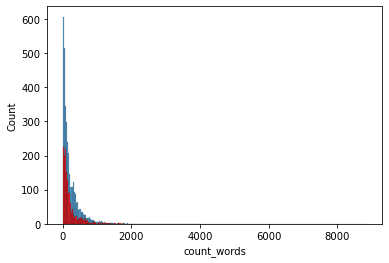

In [53]:
sns.histplot(df[df.target == 0].count_words)
sns.histplot(df[df.target == 1].count_words, color='red');

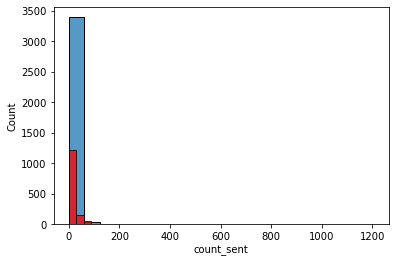

In [54]:
sns.histplot(df[df.target == 0].count_sent, bins=20)
sns.histplot(df[df.target == 1].count_sent, color='red', bins=20);

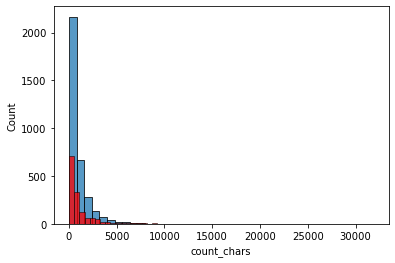

In [55]:
sns.histplot(df[df.target == 0].count_chars, bins=40)
sns.histplot(df[df.target == 1].count_chars, color='red', bins=40);

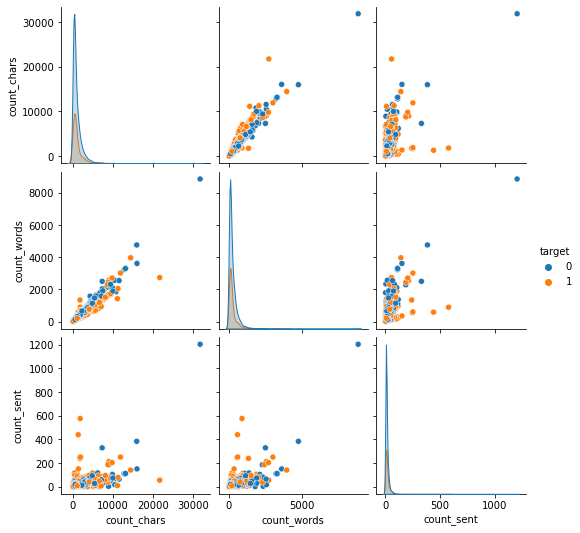

In [56]:
sns.pairplot(df, hue='target')

<AxesSubplot:>

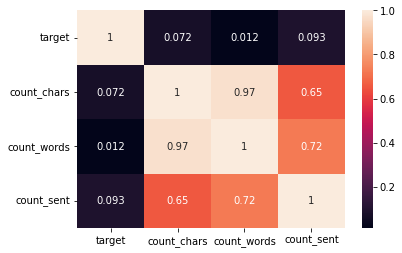

In [57]:
sns.heatmap(df.corr(), annot=True)

## Text Preprocessing

- Lower case
- Tokenization
- Removing special charachters
- Removing stop words and punctuations
- Stemming

In [62]:
from nltk.corpus import stopwords
# nltk.download('stopwords')

In [63]:
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [64]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [65]:
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
ps.stem('loving')

'love'

In [66]:
def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for word in text:
        if (word.isalnum()) and (word not in stopwords.words('english')) and (word not in string.punctuation):
            y.append(word)
            
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
            
    return ' '.join(y)

In [67]:
transform_text('I loved the YouTube lecture on machine learning. How about you?')

'love youtub lectur machin learn'

In [68]:
df.text[0]

"enron methanol ; meter # : 988291 this is a follow up to the note i gave you on monday , 4 / 3 / 00 { preliminary flow data provided by daren } . please override pop ' s daily volume { presently zero } to reflect daily activity you can obtain from gas control . this change is needed asap for economics purposes ."

In [69]:
transform_text(df.text[0])

'enron methanol meter 988291 follow note gave monday 4 3 00 preliminari flow data provid daren pleas overrid pop daili volum present zero reflect daili activ obtain ga control chang need asap econom purpos'

In [70]:
df['transformed_text'] = df.text.apply(transform_text)
df.sample(5)

,text,target,count_chars,count_words,count_sent,transformed_text
1547,hourly gas deals fyi . if you have any comment...,0,997,248,8,hourli ga deal fyi comment pleas get tommi for...
2609,holiday specials on : didrex and nasacort 60 ...,1,497,84,5,holiday special didrex nasacort 60 great produ...
4458,josey ranch est . - - mar . 2000 - - - - - - -...,0,891,239,9,josey ranch est mar 2000 forward susan trevino...
2507,homeowners - get more money in your pocket . h...,1,752,177,13,homeown get money pocket free mortgag quot 89 ...
430,westex documents per butch cheatham ' s reques...,0,440,86,7,westex document per butch cheatham request sen...


In [71]:
word_corpus = []

for sent in df[df.target == 1].transformed_text.tolist():
    for word in sent.split():
        word_corpus.append(word)
    
len(word_corpus)

194720

In [72]:
unique_word_corpus = set(word_corpus)
len(unique_word_corpus)

32993

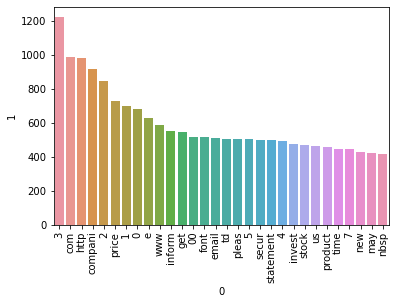

In [73]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(word_corpus).most_common(30))[0], pd.DataFrame(Counter(word_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [74]:
ham_corpus = []

for sent in df[df.target == 0].transformed_text.tolist():
    for word in sent.split():
        ham_corpus.append(word)
    
len(ham_corpus)

369974

In [75]:
unique_ham_corpus = set(ham_corpus)
len(unique_ham_corpus)

16354

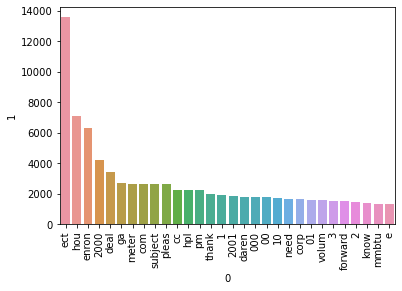

In [76]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(30))[0], pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

# Model Building

### Bag Of Words

In [77]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
cv = CountVectorizer()

In [78]:
X = cv.fit_transform(df.transformed_text).toarray()
X.shape

(4901, 42592)

In [79]:
y = df.target
y.shape

(4901,)

In [80]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((3920, 42592), (3920,)), ((981, 42592), (981,)))

In [81]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb = GaussianNB()
mnb = MultinomialNB()
bnb = BernoulliNB()

0.9877551020408163 0.9582059123343527
0.9582059123343527
0.9016949152542373


<AxesSubplot:>

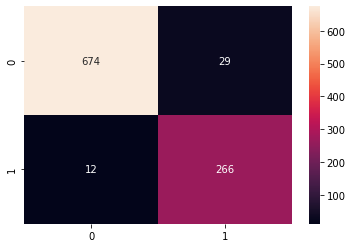

In [82]:
gnb.fit(X_train, y_train)
preds = gnb.predict(X_test)
print(gnb.score(X_train, y_train), gnb.score(X_test, y_test))

print(accuracy_score(preds, y_test))
print(precision_score(preds, y_test))
cm = confusion_matrix(preds, y_test)
sns.heatmap(cm, annot=True, fmt='d')

0.9880102040816326 0.9836901121304791
0.9836901121304791
0.9830508474576272


<AxesSubplot:>

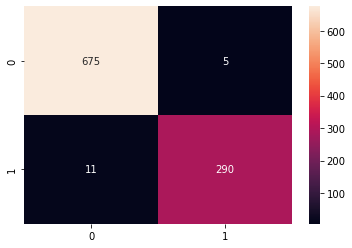

In [83]:
mnb.fit(X_train, y_train)
preds2 = mnb.predict(X_test)
print(mnb.score(X_train, y_train), mnb.score(X_test, y_test))

print(accuracy_score(preds2, y_test))
print(precision_score(preds2, y_test))
cm2 = confusion_matrix(preds2, y_test)
sns.heatmap(cm2, annot=True, fmt='d')

0.8798469387755102 0.8634046890927625
0.8634046890927625
0.5966101694915255


<AxesSubplot:>

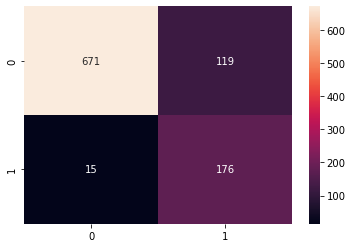

In [84]:
bnb.fit(X_train, y_train)
preds3 = bnb.predict(X_test)
print(bnb.score(X_train, y_train), bnb.score(X_test, y_test))

print(accuracy_score(preds3, y_test))
print(precision_score(preds3, y_test))
cm3 = confusion_matrix(preds3, y_test)
sns.heatmap(cm3, annot=True, fmt='d')

### Using tfidf

In [85]:
tfidf = TfidfVectorizer()

X = tfidf.fit_transform(df.transformed_text).toarray()
y = df.target
X.shape, y.shape

((4901, 42592), (4901,))

In [86]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
(X_train.shape, y_train.shape), (X_test.shape, y_test.shape)

(((3920, 42592), (3920,)), ((981, 42592), (981,)))

In [87]:
from sklearn.naive_bayes import GaussianNB, MultinomialNB, BernoulliNB
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score

gnb2 = GaussianNB()
mnb2 = MultinomialNB()
bnb2 = BernoulliNB()

0.9905612244897959 0.9469928644240571
0.9469928644240571
0.911864406779661


<AxesSubplot:>

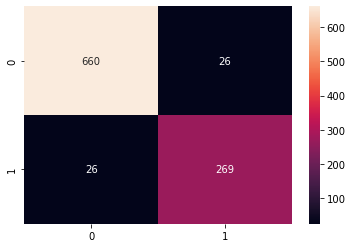

In [88]:
gnb2.fit(X_train, y_train)
preds = gnb2.predict(X_test)
print(gnb2.score(X_train, y_train), gnb2.score(X_test, y_test))

print(accuracy_score(preds, y_test))
print(precision_score(preds, y_test))
cm = confusion_matrix(preds, y_test)
sns.heatmap(cm, annot=True, fmt='d')

0.8798469387755102 0.8634046890927625
0.8634046890927625
0.5966101694915255


<AxesSubplot:>

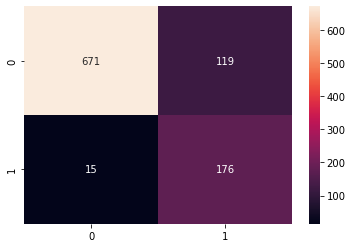

In [89]:
bnb2.fit(X_train, y_train)
preds3 = bnb2.predict(X_test)
print(bnb2.score(X_train, y_train), bnb2.score(X_test, y_test))

print(accuracy_score(preds3, y_test))
print(precision_score(preds3, y_test))
cm3 = confusion_matrix(preds3, y_test)
sns.heatmap(cm3, annot=True, fmt='d')

0.9543367346938776 0.9184505606523955
0.9184505606523955
0.735593220338983


<AxesSubplot:>

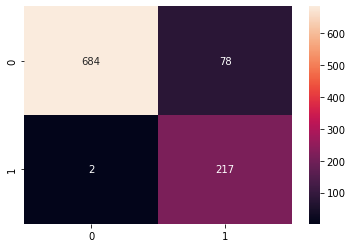

In [90]:
mnb2.fit(X_train, y_train)
preds2 = mnb2.predict(X_test)
print(mnb2.score(X_train, y_train), mnb2.score(X_test, y_test))

print(accuracy_score(preds2, y_test))
print(precision_score(preds2, y_test))
cm2 = confusion_matrix(preds2, y_test)
sns.heatmap(cm2, annot=True, fmt='d')

In [91]:
import pickle
pickle.dump(cv, open('bagofWords.pkl', 'wb'))
pickle.dump(mnb, open('MNBmodel.pkl', 'wb'))

In [96]:
text = "Notifications involving money owed to you are enticing, arent they? Our records show that you overpaid for (a product or service). Kindly supply your bank routing and account number to receive your refund. Don't fall for it."

txt = transform_text(text)
txt = cv.transform([txt])
print(txt.shape)

mnb.predict(txt)[0]

(1, 42592)


1